교육 수준 별로 나이와 임금의 관계를 탐색하기 위한 시각화를 구현하고, 시각화 결과에서 알 수 있는 사
실을 설명하세요

In [4]:
from hossam import load_data
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb

In [5]:
my_dpi = 200                                    # 이미지 선명도(100~300)
font_path = "./NotoSansKR-Regular.ttf"          # 한글을 지원하는 폰트 파일의 경로
fm.fontManager.addfont(font_path)               # 폰트의 글꼴을 시스템에 등록함
font_prop = fm.FontProperties(fname=font_path)  # 폰트의 속성을 읽어옴
font_name = font_prop.get_name()                # 읽어온 속성에서 폰트의 이름만 추출     
plt.rcParams['font.family'] = font_name         # 그래프에 한글 폰트 적용
plt.rcParams['font.size'] = 10                  # 기본 폰트크기
plt.rcParams['axes.unicode_minus'] = False      # 그래프에 마이너스 깨짐 방지(한글환경에서 필수)

In [6]:
origin = load_data('wage')
origin

[data] https://data.hossam.kr/data/lab06/wage.xlsx
[desc] Wage 데이터 셋은 경제 및 노동 시장에 관련된 정보를 담고 있는 데이터셋(출처: ADsP 기출문제)

field       description
----------  ------------------
year        년도
age         나이
maritl      결혼여부
race        근로자의 인종
education   교육수준
region      지역
jobclass    직군
health      건상상태
health_ins  건강보험 가입 여부
logwage     임금(로그값)
wage        임금



,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154
...,...,...,...,...,...,...,...,...,...,...,...
2995,2008,44,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,5.041393,154.685293
2996,2007,30,2. Married,1. White,2. HS Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,2. No,4.602060,99.689464
2997,2005,27,2. Married,2. Black,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.193125,66.229408
2998,2005,27,1. Never Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,4.477121,87.981033


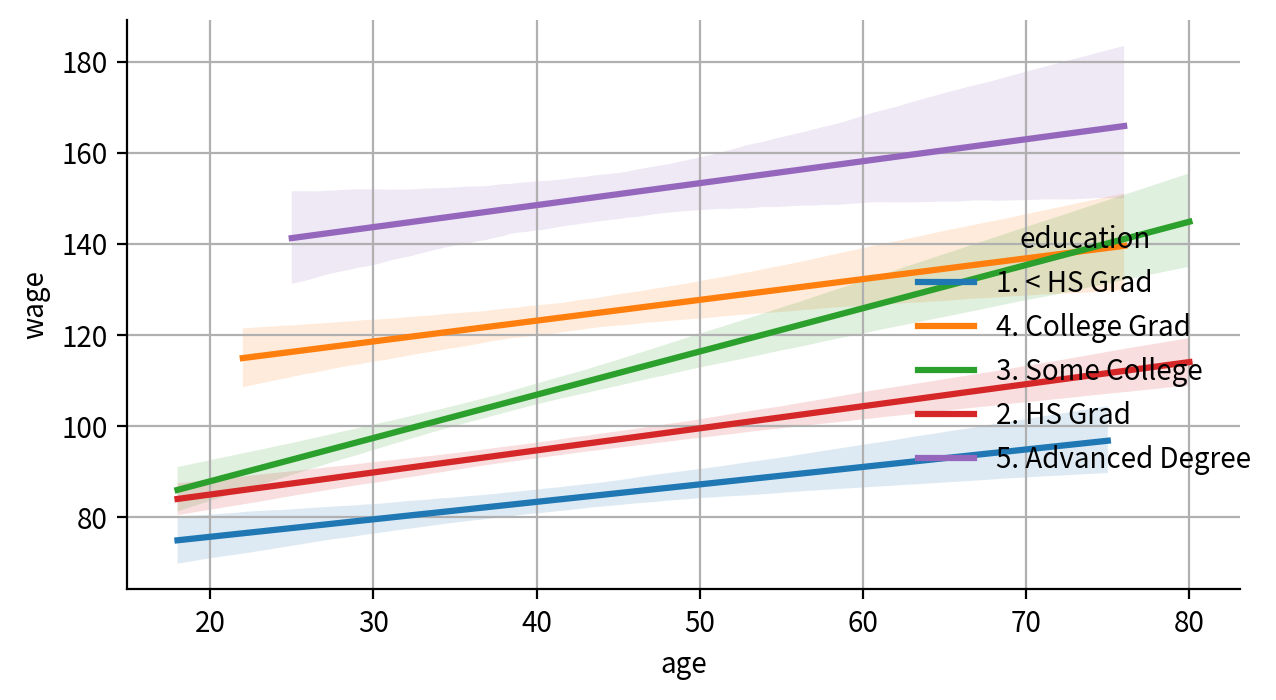

In [7]:
width_px = 1280
height_px = 720
figsize = (width_px/ my_dpi, height_px/ my_dpi)


g =sb.lmplot(data=origin, x='age',y='wage', hue='education',scatter=False)

g.fig.set_dpi(my_dpi)
g.fig.set_figwidth(figsize[0])
g.fig.set_figheight(figsize[1])
plt.grid()


plt.tight_layout()
plt.show()
plt.close()

1. 대학교를 졸업하기 전 (1,2,3)은 임금의 시작이 100만원 이하 이고, age가 40에서 임금의 격차가 나기 시작한다.
대학교를 졸업한 4,5번은 시작부터 100만원 이상이며, 1,2,3번과 달리 기울기가 커 임금의 상승률이 높다.


인종(race)별로 직업군(jobclass)에 따른 임금(wage) 분포를 비교할 수 있는 시각화를 구현하고, 시각
화 결과에서 알 수 있는 사실을 설명하세요.

C:\Users\itwill\AppData\Local\Temp\ipykernel_7988\1645915569.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.violinplot(data=origin,x='jobclass', y='wage',inner='box', palette='Set2')
C:\Users\itwill\AppData\Local\Temp\ipykernel_7988\1645915569.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.violinplot(data=origin,x='jobclass', y='wage',inner='box', palette='Set2')
C:\Users\itwill\AppData\Local\Temp\ipykernel_7988\1645915569.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.violinplot(data=origin,x='jobclass', y='wage',inner='box', palette='Set2')
C:\User

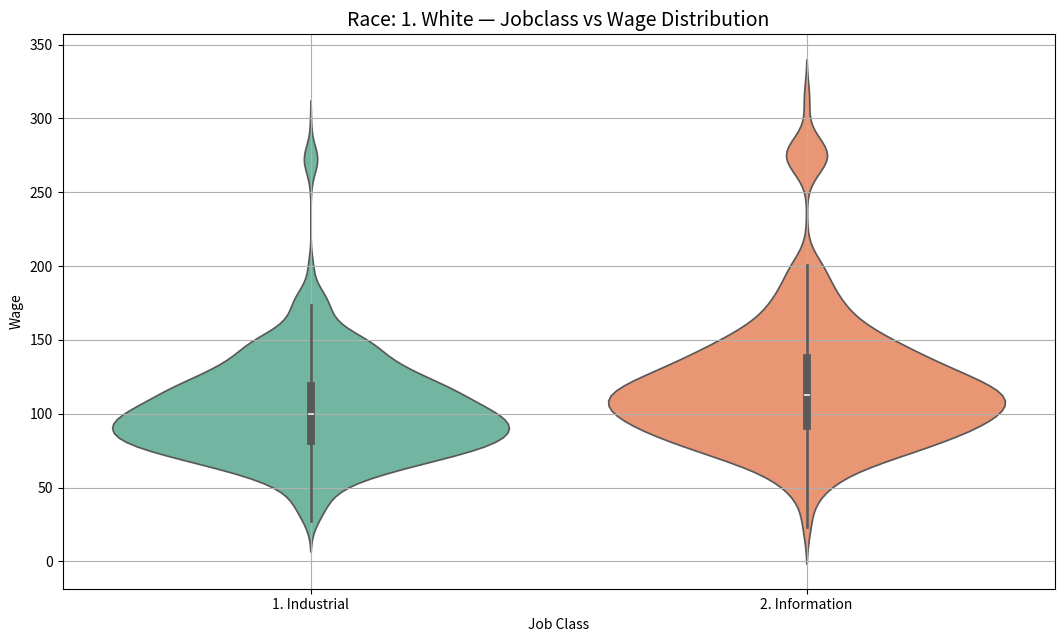

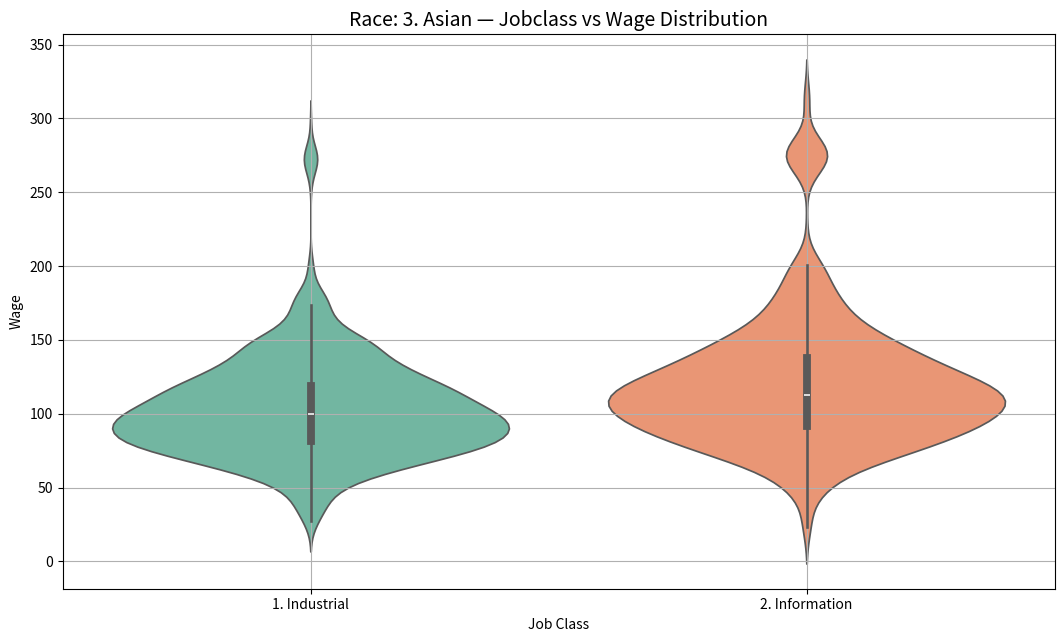

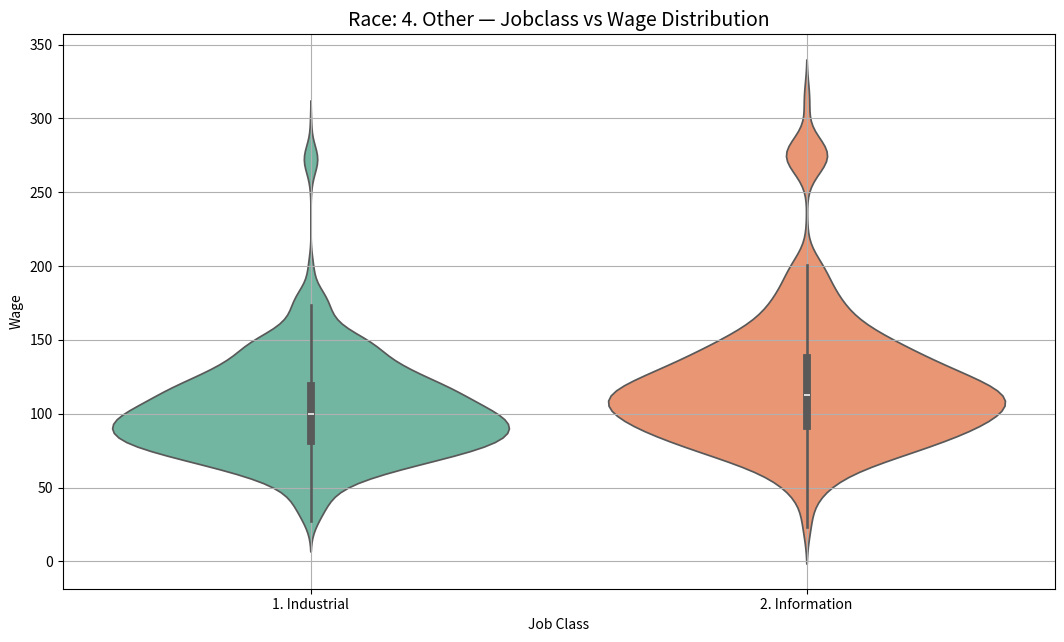

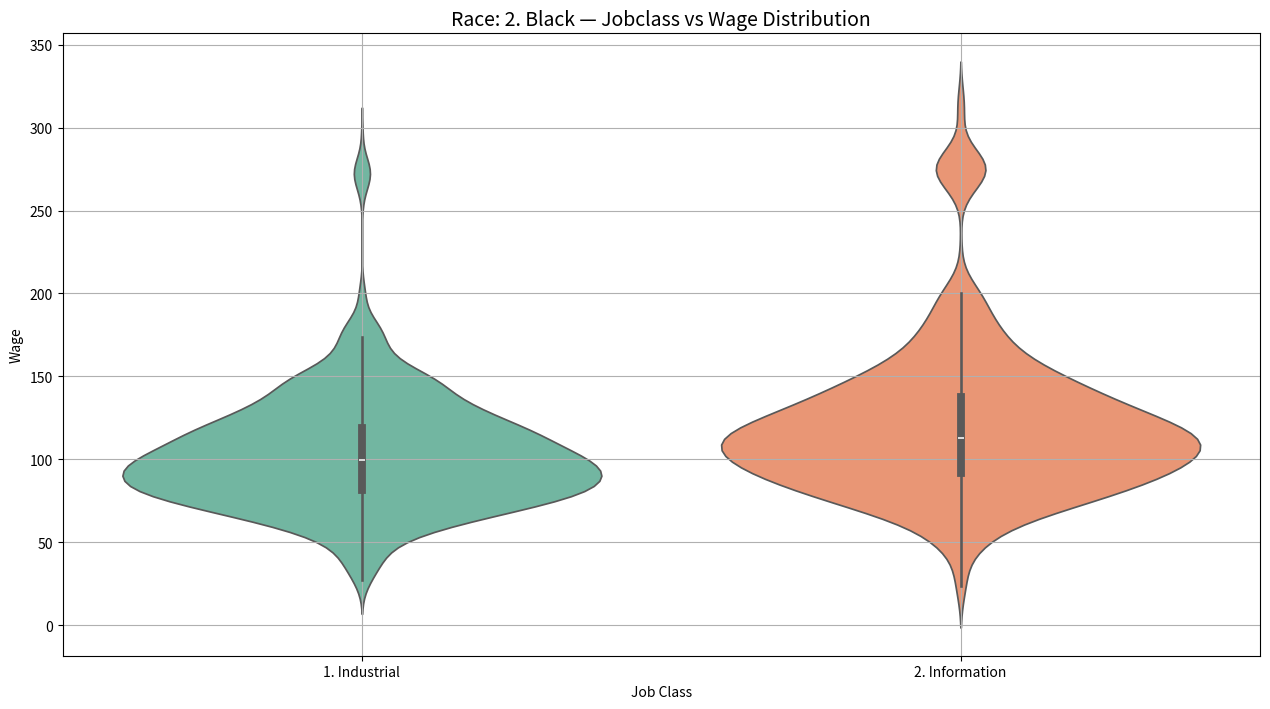

In [11]:
width_px = 1280
height_px = 720
my_dpi = 100
figsize = (width_px/ my_dpi, height_px/ my_dpi)

race_list = origin['race'].unique()

for race_value in race_list:
    subset = origin[origin['race'] == race_value]

    fig, ax = plt.subplots(figsize=figsize, dpi=my_dpi)

    sb.violinplot(data=origin,x='jobclass', y='wage',inner='box', palette='Set2')
    ax.set_title(f"Race: {race_value} — Jobclass vs Wage Distribution", fontsize=14)
    ax.set_xlabel("Job Class")
    ax.set_ylabel("Wage")
    ax.grid(True)
    


ax.grid(True)
plt.tight_layout()
plt.show()
plt.close()